In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy.stats import laplace, norm, uniform

In [4]:
param_files = ["exp_params.txt", "pair_params.txt", "peptide_params.txt"]
params = {}
for pf in param_files:
    pfp = os.path.join("/gd/bayesian_RT/Alignments/SQC_20180815_2", pf)
    #pfp = os.path.join("/Users/albert/git/RTLib/Alignments/NCE_20180520_4", pf)
    if os.path.exists(pfp):
      with open(pfp, "rb") as f:
        try:
          params[pf.split("_")[0]] = pd.read_csv(pfp, sep="\t")
        except:
          print("some error")
params

{'exp':         beta_0    beta_1    beta_2  sigma_intercept  sigma_slope  split_point  \
 0    13.039694  0.652374  0.643696         0.137835     0.110719    34.560044   
 1     5.596057  0.625587  0.769449         0.294159     0.132162    26.757307   
 2     6.803289  0.845530  0.759320         0.281499     0.136232    25.785447   
 3     6.737086  0.850836  0.753809         0.234575     0.127138    25.502208   
 4     7.824703  0.789791  0.508273         0.285859     0.136664    47.522128   
 5     7.826316  0.786502  0.508961         0.291131     0.135268    47.983750   
 6     7.600372  0.790126  0.520268         0.309148     0.142555    47.235676   
 7     7.703628  0.785173  0.514531         0.294178     0.138370    47.916408   
 8     8.128260  0.775402  0.539136         0.275409     0.132695    47.823397   
 9     7.681924  0.783680  0.527687         0.278752     0.134515    47.754887   
 10    7.938614  0.777059  0.526225         0.287173     0.134649    48.201228   
 11    8.

In [5]:
#dfa = pd.read_csv('./../dat/ev.IFN_c.txt', sep='\t')
#dfa = pd.read_csv('./../dat/ev_nce_c_1.txt', sep='\t')
#dfa = pd.read_csv("/gd/SingleCell_Data/FP17/evidence_c.txt", sep="\t")
dfa = pd.read_csv('/gd/bayesian_RT/Alignments/SQC_20180815_2/ev_updated.txt', sep='\t', low_memory=False)
dfa

/Users/albert/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (82,90) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Sequence,Length,Modifications,Modified sequence,Oxidation (M) Probabilities,Oxidation (M) Score Diffs,Acetyl (Protein N-term),Oxidation (M),Missed cleavages,Proteins,...,muij,pep_new,peptide_id,rt_minus,rt_plus,sigmaij,stan_peptide_id,pep_updated,q-value,prot_fdr
0,AAAAAAALQAK,11,Unmodified,_AAAAAAALQAK_,NaN,NaN,0,0,0,sp|P36578|RL4_HUMAN60SribosomalproteinL4OS=Hom...,...,37.657312,1.078405e-05,0.0,0.042393,0.253234,0.337481,0.0,1.078405e-05,0.000008,1.814580e-08
1,AAAAAAALQAK,11,Unmodified,_AAAAAAALQAK_,NaN,NaN,0,0,0,sp|P36578|RL4_HUMAN60SribosomalproteinL4OS=Hom...,...,37.534676,2.131293e-04,0.0,0.042854,0.278506,0.342226,0.0,2.131293e-04,0.000044,1.814580e-08
2,AAAAAAALQAK,11,Unmodified,_AAAAAAALQAK_,NaN,NaN,0,0,0,sp|P36578|RL4_HUMAN60SribosomalproteinL4OS=Hom...,...,37.445615,1.589575e-05,0.0,0.041090,0.287841,0.362995,0.0,1.589575e-05,0.000008,1.814580e-08
3,AAAAAAALQAK,11,Unmodified,_AAAAAAALQAK_,NaN,NaN,0,0,0,sp|P36578|RL4_HUMAN60SribosomalproteinL4OS=Hom...,...,37.361802,6.185735e-05,0.0,0.041125,0.312588,0.346444,0.0,6.185735e-05,0.000015,1.814580e-08
4,AAAAAAALQAK,11,Unmodified,_AAAAAAALQAK_,NaN,NaN,0,0,0,sp|P36578|RL4_HUMAN60SribosomalproteinL4OS=Hom...,...,37.283701,8.651096e-06,0.0,0.042920,0.264140,0.329562,0.0,8.651096e-06,0.000008,1.814580e-08
5,AAAAAAALQAK,11,Unmodified,_AAAAAAALQAK_,NaN,NaN,0,0,0,sp|P36578|RL4_HUMAN60SribosomalproteinL4OS=Hom...,...,37.290278,1.253275e-05,0.0,0.045281,0.192362,0.338033,0.0,1.253275e-05,0.000008,1.814580e-08
6,AAAAAAALQAK,11,Unmodified,_AAAAAAALQAK_,NaN,NaN,0,0,0,sp|P36578|RL4_HUMAN60SribosomalproteinL4OS=Hom...,...,37.290278,3.111576e-10,0.0,0.045282,0.191615,0.338033,0.0,3.111576e-10,0.000008,1.814580e-08
7,AAAAAAALQAK,11,Unmodified,_AAAAAAALQAK_,NaN,NaN,0,0,0,sp|P36578|RL4_HUMAN60SribosomalproteinL4OS=Hom...,...,37.357579,2.335340e-05,0.0,0.047485,0.217908,0.341680,0.0,2.335340e-05,0.000008,1.814580e-08
8,AAAAAAALQAK,11,Unmodified,_AAAAAAALQAK_,NaN,NaN,0,0,0,sp|P36578|RL4_HUMAN60SribosomalproteinL4OS=Hom...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.338100e-04,0.000030,1.814580e-08
9,AAAAAAALQAK,11,Unmodified,_AAAAAAALQAK_,NaN,NaN,0,0,0,sp|P36578|RL4_HUMAN60SribosomalproteinL4OS=Hom...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.075300e-05,0.000015,1.814580e-08


In [28]:
dff = dfa[-(dfa["remove"])].reset_index(drop=True)

# factorize experiments into exp_id
#eidx = dff["raw_file"].unique()
#print(len(eidx))
#dff["exp_id"] = dff["raw_file"].map({ind: val for val, ind in enumerate(dff["raw_file"].unique())})

# factorize sequence into peptide_id
#dff["stan_peptide_id"] = dff["sequence"].map({ind: val for val, ind in enumerate(dff["sequence"].unique())})

num_experiments = dff["exp_id"].max() + 1
num_observations = dff.shape[0]
num_peptides = dff["peptide_id"].max() + 1
retention_times = dff["Retention time"]
pep = dff["PEP"]
stan_peptide_id = dff["peptide_id"]
exp_id = dff["exp_id"]
exp_names = dff['Raw file'].unique()
mean_log_rt = np.mean(np.log(retention_times))
sd_log_rt = np.std(np.log(retention_times))
max_rt = retention_times.max()

pep_exp_all = dff["peptide_id"].map(str) + " - " + dff["exp_id"].map(str)
pep_exp_pairs = pep_exp_all.unique()
num_pep_exp_pairs = len(pep_exp_pairs)
print(len(pep_exp_all))
print(len(pep_exp_all.unique()))
muij_map = pep_exp_all.map({ind: val for val, ind in enumerate(pep_exp_pairs)})
#muij_map
#dff

385966
369774


In [103]:
sm = dfa.groupby(["exp_id", "peptide_id"])["retention_time"].apply(lambda x: np.ptp(x))
sm

exp_id  peptide_id
0       1             0.000
        2             0.000
        4             0.000
        8             0.000
        9             0.000
        10            0.000
        13            0.000
        14            0.000
        23            0.000
        24            0.000
        25            0.000
        26            0.000
        28            0.000
        30            0.000
        41            0.001
        42            0.000
        43            0.036
        57            0.000
        58            0.000
        59            0.000
        63            0.000
        64            0.003
        65            0.000
        67            0.000
        68            0.000
        72            0.000
        75            0.000
        84            0.000
        86            0.000
        87            0.000
                      ...  
52      22608         0.000
        22611         0.000
        22619         0.000
        22620         0.000
 

In [156]:
#print(sm.loc[(0, 1),])
#dir(sm.index)

max_rts = dfa.groupby(["exp_id"])["retention_time"].max().values
max_rts[sm.index.to_frame()["exp_id"].values]

temp = sm[sm > max_rts[sm.index.to_frame()["exp_id"].values] / 30].index.values

pd.Series(list(zip(dfa["exp_id"], dfa["peptide_id"]))).isin(temp).sum()
#dfa["sequence"].isin(temp)



2187

In [12]:
num_experiments

226.0

In [13]:
pep_col_code = pd.cut(dff["PEP"], 10)

for exp in range(0, int(num_experiments)):
    print("Generating Summary for Experiment", exp, "|", exp_names[exp])

    exp_params = params["exp"].iloc[exp]
    exp_indices = params["pair"]["muij_to_exp"] == exp

    muijs = params["pair"]["muij"][exp_indices].values
    #sigmas = (exp_params["sigma_slope"] / 100 * muijs) + exp_params["sigma_intercept"]
    sigmas = params["pair"]["sigma_ij"][exp_indices].values

    predicted = params["pair"]["muij"][muij_map][exp_indices[muij_map]]
    predicted_sd = params["pair"]["sigma_ij"][muij_map][exp_indices[muij_map]]


    mus = params["peptide"]["mu"][params["pair"]["muij_to_pep"][muij_map][exp_indices[muij_map]]]
    #dff["retention_time"][exp_indices[muij_map]]

    observed = retention_times.values[exp_indices[muij_map]]
    obs_peps = pep.values[exp_indices[muij_map]]
    obs_code = pep_col_code.values[exp_indices[muij_map]]
    residual = observed - predicted


    plt.subplot(221)
    plt.scatter(mus, observed, s=1, color="black")
    #plt.scatter(predicted, observed)
    plt.plot([0, exp_params["split_point"]],
             [exp_params["beta_0"], (exp_params["split_point"] * exp_params["beta_1"]) + exp_params["beta_0"]],
            color="red")
    plt.plot([exp_params["split_point"], 300], 
             [(exp_params["split_point"] * exp_params["beta_1"]) + exp_params["beta_0"], (exp_params["split_point"] * exp_params["beta_1"]) + ((300-exp_params["split_point"]) * exp_params["beta_2"]) + exp_params["beta_0"]],
            color="green")
    plt.plot(np.repeat(exp_params["split_point"], 2), [-100, 300], color="blue", linestyle="dashed")
    plt.axis([0, mus.max() + 10, exp_params["beta_0"]-10, observed.max() + 10])
    plt.title(exp_names[exp])
    plt.xlabel("Canonical RT (min)")
    plt.ylabel("Observed RT (min)")

    plt.subplot(222)
    plt.scatter(predicted, observed, color="black", s=1)
    plt.plot([0, 300], [0, 300])
    plt.plot(np.repeat(exp_params["split_point"], 2), [-100, 300], color="blue", linestyle="dashed")
    plt.axis([0, predicted.max()+10, 0, observed.max()+10])
    plt.xlabel("Predicted RT (min)")
    plt.ylabel("Observed RT (min)")

    plt.subplot(223)
    plt.scatter(predicted, residual, s=1, c=pep_col_code.cat.codes.values[exp_indices[muij_map]])
    plt.plot([0, 300], [0, 0], color="blue")
    plt.plot(np.repeat(exp_params["split_point"], 2), [-100, 300], color="blue", linestyle="dashed")
    plt.plot(predicted.values[np.argsort(predicted)], laplace.ppf(0.025, loc=0, scale=predicted_sd)[np.argsort(predicted)], color="red")
    plt.plot(predicted.values[np.argsort(predicted)], laplace.ppf(0.975, loc=0, scale=predicted_sd)[np.argsort(predicted)], color="red")
    plt.axis([predicted.min()-5, predicted.max()+5, residual.min()-5, residual.max()+5])
    cbar = plt.colorbar()
    cbar.ax.set_yticklabels(pep_col_code.cat.categories.values)
    plt.xlabel("Predicted RT (min)")
    plt.ylabel("Residual RT (min)")

    plt.subplots_adjust(hspace=0.3, wspace=0.3)


    fig = plt.gcf()
    fig.set_size_inches(7, 7)
    fname = "./tmp_figs/alignment_" + str(exp) + "_" + exp_names[exp] + ".png"
    print("Saving figure to", fname, "...")
    fig.savefig(fname, dpi=160)
    
    plt.close()
    fig.clf()

Generating Summary for Experiment 0 | 180320S_QC_SQC67C8


/Users/albert/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


ValueError: cannot index with vector containing NA / NaN values

In [7]:
from scipy.stats import laplace

In [8]:
laplace.ppf([0.05, 0.5, 0.95])
#print(len(laplace.ppf(0.025, loc=0, scale=predicted_sd)[np.argsort(predicted)]))
#print(len(predicted.values[np.argsort(predicted)]))
#predicted

array([-2.30258509,  0.        ,  2.30258509])

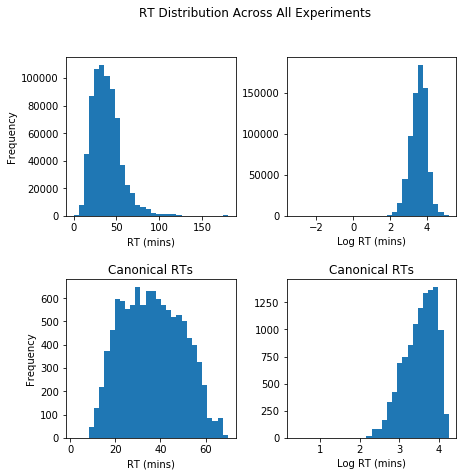

In [16]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.hist(dfa["Retention time"], bins=30)
ax1.set(xlabel="RT (mins)", ylabel="Frequency")

ax2.hist(np.log(dfa["Retention time"]), bins=30)
ax2.set(xlabel="Log RT (mins)")

ax3.hist(params["peptide"]["mu"], bins=30)
ax3.set(xlabel="RT (mins)", ylabel="Frequency", title="Canonical RTs")
ax4.hist(np.log(params["peptide"]["mu"]), bins=30)
ax4.set(xlabel="Log RT (mins)", title="Canonical RTs")

f.suptitle("RT Distribution Across All Experiments")

plt.subplots_adjust(hspace=0.4, wspace=0.3)

fig = plt.gcf()
fig.set_size_inches(7, 7)

plt.show()
f.clf()

In [27]:
dff
muij_map

0              0
1              1
2              2
3              3
4              4
5              5
6              5
7              6
8              7
9              8
10             9
11            10
12            11
13            12
14            13
15            14
16            15
17            16
18            17
19            18
20            18
21            19
22            20
23            21
24            22
25            23
26            24
27            25
28            26
29            27
           ...  
385936    369744
385937    369745
385938    369746
385939    369747
385940    369748
385941    369749
385942    369750
385943    369751
385944    369752
385945    369753
385946    369754
385947    369755
385948    369756
385949    369757
385950    369758
385951    369759
385952    369760
385953    369761
385954    369762
385955    369763
385956    369764
385957    369765
385958    369766
385959    369767
385960    369768
385961    369769
385962    369770
385963    3697

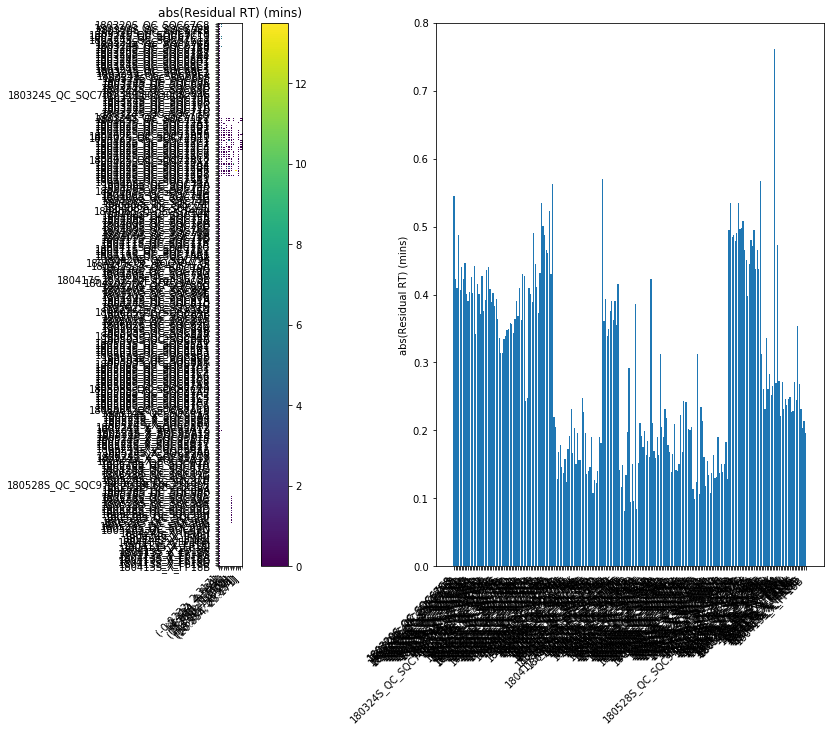

In [29]:
cuts = 10

exp_names = dff["Raw file"].unique()

#dff["muij"] = params["pair"]["muij"][muij_map].values
dff["pep_col_code"] = pd.cut(dff["PEP"], cuts)
dff["residual"] = dff["Retention time"] - dff["muij"]
dff["abs_residual"] = np.abs(dff["residual"])
dff["residual_sq"] = pow(dff["residual"], 2)

#res = dff.groupby(["exp_id", "pep_col_code"])["abs_residual"].mean()
res = np.ones((int(num_experiments), 10))
for i in range(0, int(num_experiments)):
    for j in range(0, cuts):
        desi = dff["abs_residual"][(dff["exp_id"] == i) & (dff["pep_col_code"].cat.codes == j)]
        if len(desi) == 0:
            res[i][j] = np.nan
        else:
            res[i][j] = np.nanmean(desi.values)

res_map = res

f, (ax1, ax2) = plt.subplots(1, 2)

mp = ax1.imshow(res_map, interpolation="nearest", vmin=0)
plt.colorbar(mp, ax=ax1)

ax1.set_xticks(np.arange(-.5, cuts, 1))
# Major ticks
ax1.set_xticks(np.arange(0, cuts, 1));
ax1.set_yticks(np.arange(0, len(exp_names), 1));
# Labels for major ticks
ax1.set_xticklabels(dff["pep_col_code"].cat.categories.to_series(), rotation=45, ha="right")
ax1.set_yticklabels(exp_names);
# Minor ticks
ax1.set_xticks(np.arange(-.5, cuts, 1), minor=True);
ax1.set_yticks(np.arange(-.5, len(exp_names), 1), minor=True);
# Gridlines based on minor ticks
ax1.grid(which='minor', color='w', linestyle='-', linewidth=1)
ax1.set(title="abs(Residual RT) (mins)")

res_bars = dff.groupby(["exp_id"])["abs_residual"].mean()
ax2.bar(range(0, int(num_experiments)), res_bars.values)
ax2.set_xticks(np.arange(0, int(num_experiments), 1))
ax2.set_xticklabels(exp_names, rotation=45, ha="right")
ax2.set(ylabel="abs(Residual RT) (mins)")

plt.subplots_adjust(hspace=0.3, wspace=0.3)

fig = plt.gcf()
fig.set_size_inches(16, 10)

plt.show()
fig.clf()

In [20]:
dff.columns.values

array(['Sequence', 'Length', 'Modifications', 'Modified sequence',
       'Oxidation (M) Probabilities', 'Oxidation (M) Score Diffs',
       'Acetyl (Protein N-term)', 'Oxidation (M)', 'Missed cleavages',
       'Proteins', 'Leading proteins', 'Leading razor protein', 'Type',
       'Raw file', 'MS/MS m/z', 'Charge', 'm/z', 'Mass', 'Resolution',
       'Uncalibrated - Calibrated m/z [ppm]',
       'Uncalibrated - Calibrated m/z [Da]', 'Mass error [ppm]',
       'Mass error [Da]', 'Uncalibrated mass error [ppm]',
       'Uncalibrated mass error [Da]', 'Max intensity m/z 0',
       'Retention time', 'Retention length', 'Calibrated retention time',
       'Calibrated retention time start',
       'Calibrated retention time finish', 'Retention time calibration',
       'Match time difference', 'Match m/z difference', 'Match q-value',
       'Match score', 'Number of data points', 'Number of scans',
       'Number of isotopic peaks', 'PIF', 'Fraction of total spectrum',
       'Base peak fr

/Users/albert/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


TypeError: 'numpy.float64' object cannot be interpreted as an integer

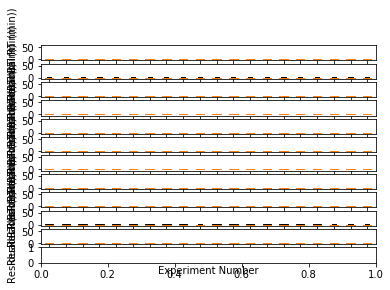

In [21]:
exp_names = dff["Raw file"].unique()
dff['residual'] = np.abs(dff['Retention time'] - dff['muij'])

#res = dff.groupby("exp_id")["residual"].apply(lambda x: x[~pd.isnull(x)].values.tolist()).values.tolist()
#res = dff.groupby("exp_id")["residual"].apply(lambda x: x[~pd.isnull(x)])
#res = np.log(res)

plots_per_row = 20
num_rows = int(np.ceil(num_experiments/plots_per_row))

#f, axes = plt.subplots(num_rows, 1)
#f, ax = plt.subplots()

resi = []

for i in range(0, num_rows):
    ax = plt.subplot2grid((num_rows, 1), (i, 0))
    
    if (i+1)*plots_per_row > num_experiments:
        #resi = res.loc[(i*plots_per_row):num_experiments]
        resi = [dff["residual"][(dff["exp_id"]==i) & (~pd.isnull(dff["residual"]))] for i in range((i*plots_per_row), num_experiments)]
        ax.boxplot(resi, showfliers=False)
        ax.set_xticklabels(np.arange((i*plots_per_row), num_experiments, 1))
    else:
        #resi = res.loc[(i*plots_per_row):((i+1)*plots_per_row)]
        resi = [dff["residual"][(dff["exp_id"]==i) & (~pd.isnull(dff["residual"]))] for i in range((i*plots_per_row), ((i+1)*plots_per_row))]
        ax.boxplot(resi, showfliers=False)
        ax.set_xticklabels(np.arange((i*plots_per_row), ((i+1)*plots_per_row), 1))
        
    #ax.violinplot(resi, showmedians=True, showextrema=True)
    
    ax.set_xticks(np.arange(1, plots_per_row+1, 1))
    ax.set_ylim(np.min(dff["residual"])-5, np.max(dff["residual"])+5)
    
    ax.set_xlabel("Experiment Number")
    ax.set_ylabel("Residual RT (min))")
    
#ax = plt.subplot2grid((num_rows, 2), (0, 1), rowspan=num_rows)
#ax.table(cellText=[[x] for x in exp_names], loc="center", colLabels=["1"], fontsize=3)
#ax.set_axis_off()
    
#plt.subplots_adjust(hspace=0.4, wspace=0.3)

f = plt.gcf()
#f.text(0.5, 0, 'Experiment Number', fontsize=16, ha='center', va='center')
#f.text(0.06, 0.5, 'Residual RT (min)', fontsize=16, ha='center', va='center', rotation='vertical')
f.set_size_inches(12, num_rows*2)
plt.tight_layout()

"""
f, ax = plt.subplots()
ax.violinplot(res)
ax.set_xticks(np.arange(1, num_experiments+1, 1))
ax.set_xticklabels(exp_names, rotation=60, ha="right")
ax.set_xlim(0, num_experiments+1)
f.set_size_inches(15, 6)
plt.show()
"""

plt.show()

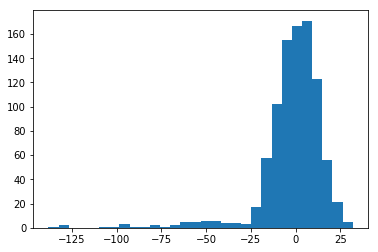

In [283]:
sd = dff.groupby("exp_id")["residual"].apply(np.nanstd)
med = dff.groupby("exp_id")["residual"].apply(np.nanmedian)

np.sum(np.abs(dff["residual"] - med) > (sd[dff["exp_id"]] * 0.5).values)

plt.hist(dff["residual"][dff["exp_id"]==0], bins=30)
plt.show()
